# Predict Diagnosis of a Breast Tumor

## 1. Problem Statement

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

## 1.1 Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Features are computed from the digitized image of the FNA of the breast mass. They describe characteristics of the cell nuclei present in the image. Use these characteristics build a model that can classify a breast cancer tumor using two categories:
* 1= Malignant (Cancerous) - Present
* 0= Benign (Not Cancerous) -Absent

### 1.2 Objective 
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem. 
        
Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

### 1.3 Get the Data
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)

In [2]:
# read the data
all_df = pd.read_csv('data/data.csv', index_col=False)
all_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [3]:
all_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Id column is redundant and not useful, we want to drop it
all_df.drop('id', axis =1, inplace=True)

### 1.4 Quick Glance on the Data

In [5]:
# The info() method is useful to get a quick description of the data, in particular the total number of rows, 
# and each attribute’s type and number of non-null values
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [6]:
# check if any column has null values
all_df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

There are 569 instances in the dataset, which means that it is very small by Machine Learning standards, but it's perfect to get started. Notice that the none of the attributes have missing values. All attributes are numerical, except the `diagnosis` field.

**Visualizing Missing Values**

The `missingno` package also provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset.

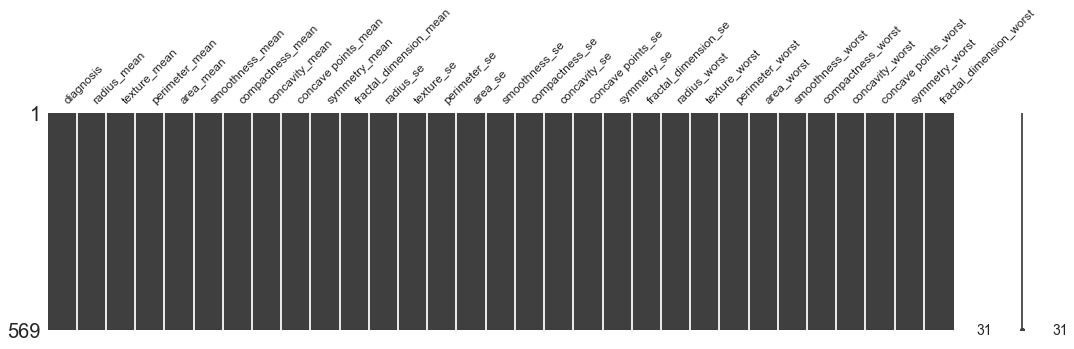

In [7]:
import missingno as msno
msno.matrix(all_df.sample(len(all_df)), figsize=(18, 4), fontsize=12)

In [8]:
# Review number of columns of each data type in a DataFrame:
all_df.get_dtype_counts()

float64    30
object      1
dtype: int64

In [9]:
# check the categorical attribute's distribution
all_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

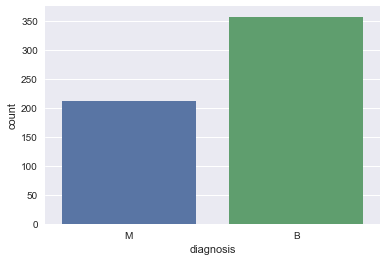

In [10]:
sns.countplot(x="diagnosis", data=all_df)

# 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, we am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## 2.1 Objectives of Data Exploration

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

**The purpose of EDA is:**
* to use summary statistics and visualizations to better understand data, find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of our data. Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.

Next step is to explore the data. There are two approaches used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

Let's look at the other fields. The `describe()` method shows a summary of the numerical attributes

In [11]:
all_df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

## 2.2 Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that we can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.

### 2.2.1. Visualise distribution of data via Histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide us a count of the number of observations in each bin. From the shape of the bins we can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help us see possible outliers.

In [12]:
all_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Separate columns into smaller dataframes to perform visualization
Break up columns into groups, according to their suffix designation (_mean, _se, and _worst) to perform visualisation plots off. 

In [13]:
np.concatenate((all_df.columns[1:11], ['diagnosis']), axis=0)

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'], dtype=object)

### Histogram the "_mean" suffix features

In [14]:
data_mean = all_df[np.concatenate((all_df.columns[1:11], ['diagnosis']), axis=0)]

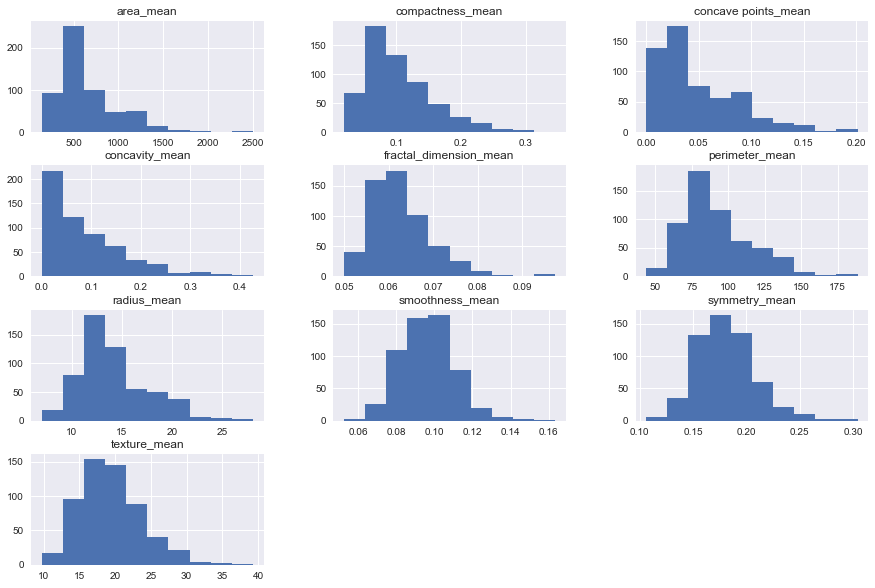

In [15]:
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

### Histogram the "_se" suffix features

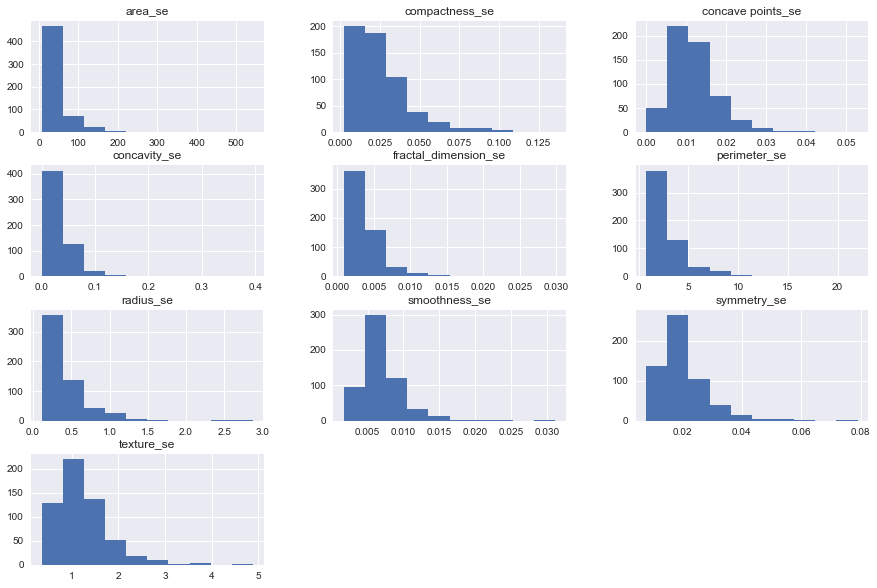

In [16]:
data_mean = all_df[np.concatenate((all_df.columns[11:21], ['diagnosis']), axis=0)]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

### Histogram the "_worst" suffix features

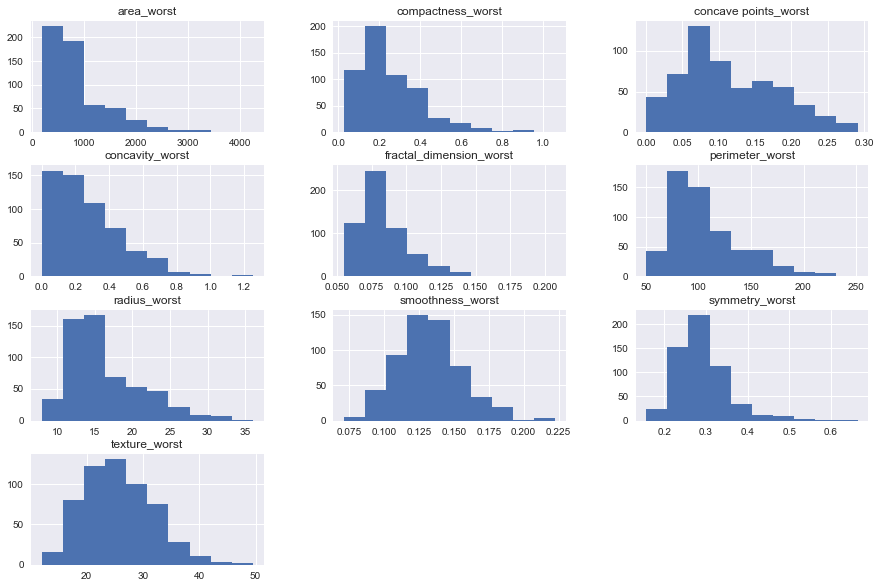

In [17]:
data_mean = all_df[np.concatenate((all_df.columns[21:], ['diagnosis']), axis=0)]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

**Observation**

We can see that perhaps the attributes  **concavity**,and **concavity_point ** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### 2.2.2. Visualise distribution of data via Density plots

### Density plots of the "_mean" suffix features

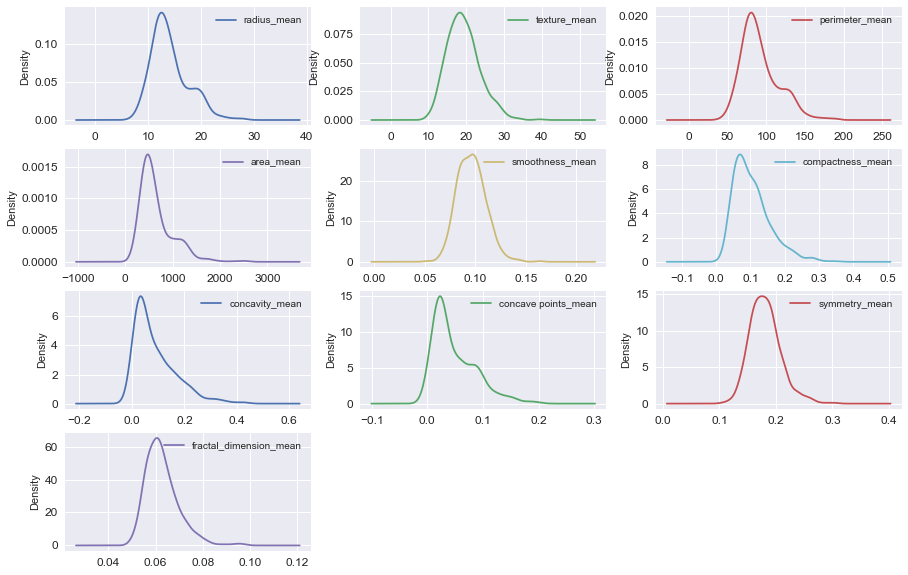

In [18]:
data_mean = all_df[np.concatenate((all_df.columns[1:11], ['diagnosis']), axis=0)]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10));

### Density plots of the "_se" suffix features

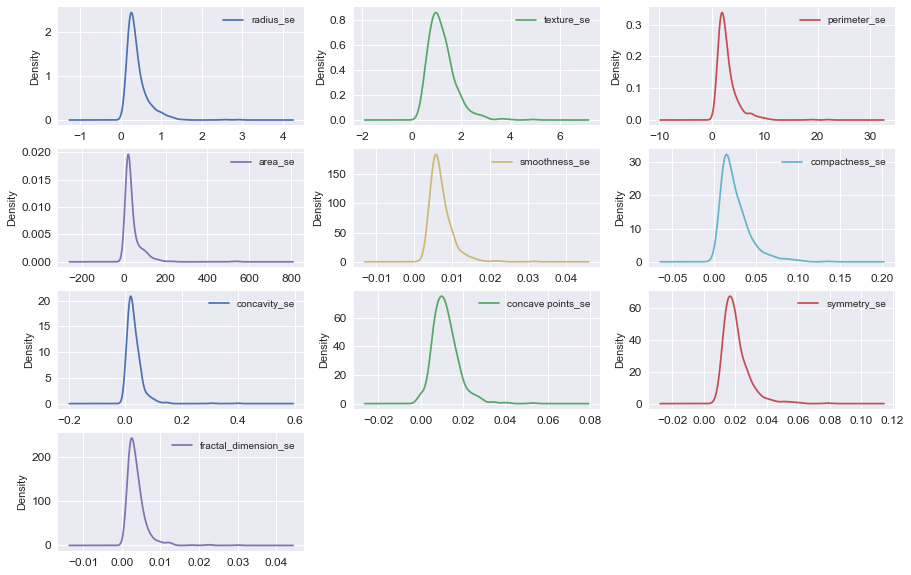

In [19]:
data_mean = all_df[np.concatenate((all_df.columns[11:21], ['diagnosis']), axis=0)]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10));

### Density plots of the "_worst" suffix features

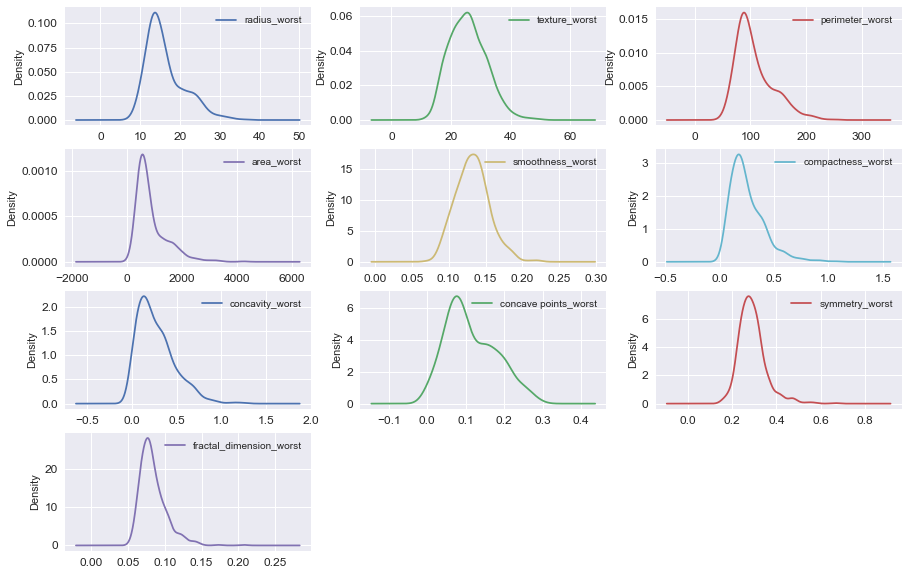

In [20]:
data_mean = all_df[np.concatenate((all_df.columns[21:], ['diagnosis']), axis=0)]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10));

**Observation**

We can see that perhaps the attributes **perimeter**, **radius**, **area**, **concavity**, **compactness** may have an exponential distribution ( ). We can also see that perhaps the **texture** and **smooth** and **symmetry** attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### 2.2.3. Visualize distribution of data via Box plots

### Box plots of the "_mean" suffix features

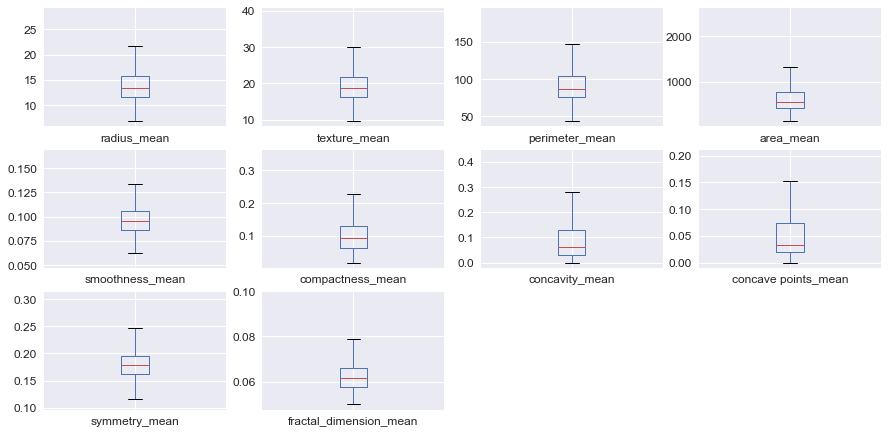

In [21]:
data_mean = all_df[np.concatenate((all_df.columns[1:11], ['diagnosis']), axis=0)]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

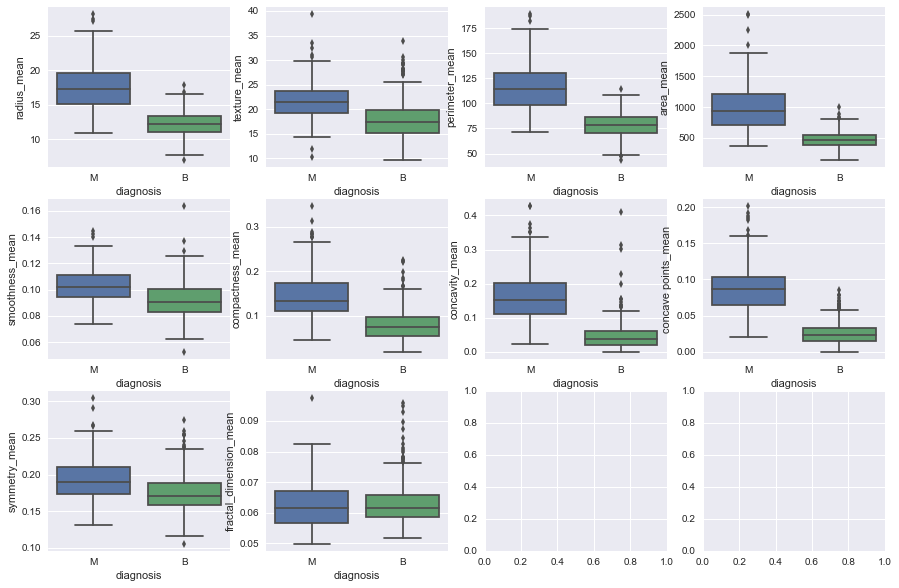

In [22]:
nrows, ncols = 3, 4
fig, axes =plt.subplots(nrows, ncols, figsize=(15,10))
for i, col in enumerate(all_df.columns[1:11]):
    sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[int(i/ncols)][i - ncols * int(i/ncols)])

### Box plots of the "_se" suffix features

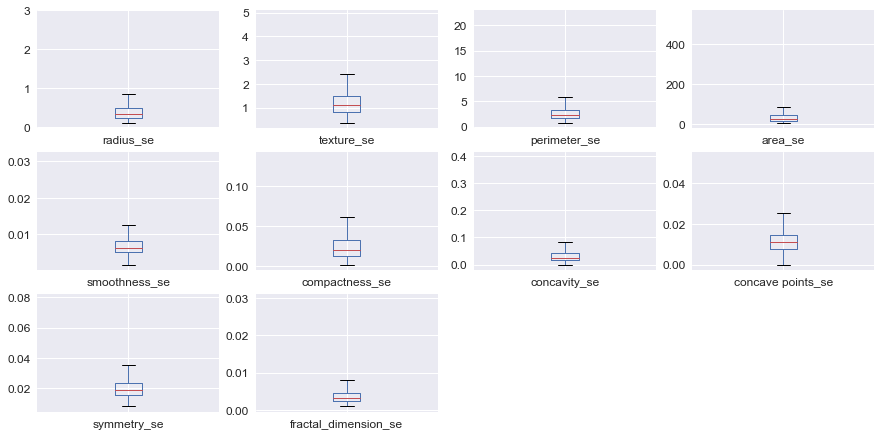

In [23]:
data_mean = all_df[np.concatenate((all_df.columns[11:21], ['diagnosis']), axis=0)]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

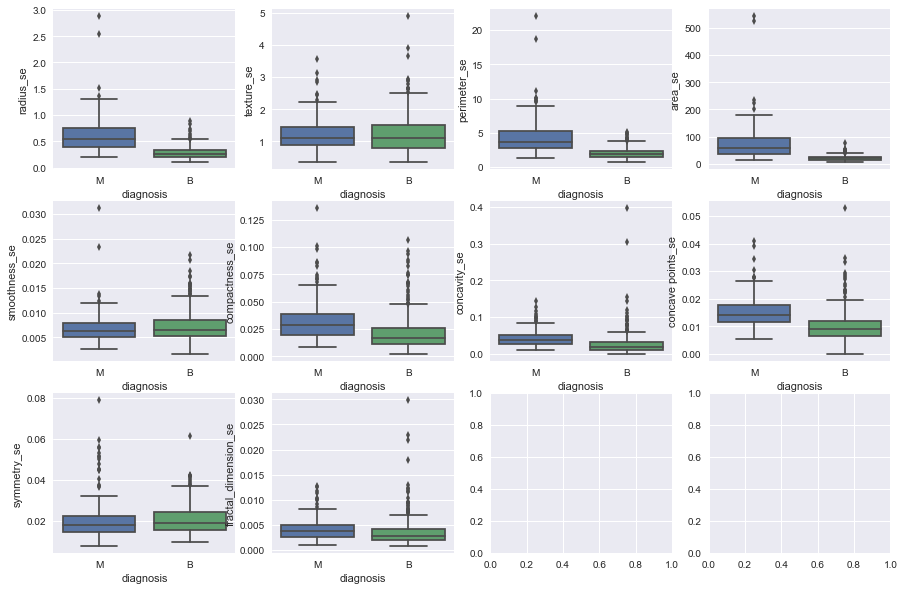

In [24]:
nrows, ncols = 3, 4
fig, axes =plt.subplots(nrows, ncols, figsize=(15,10))
for i, col in enumerate(all_df.columns[11:21]):
    sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[int(i/ncols)][i - ncols * int(i/ncols)])

### Box plots of the "_worst" suffix features

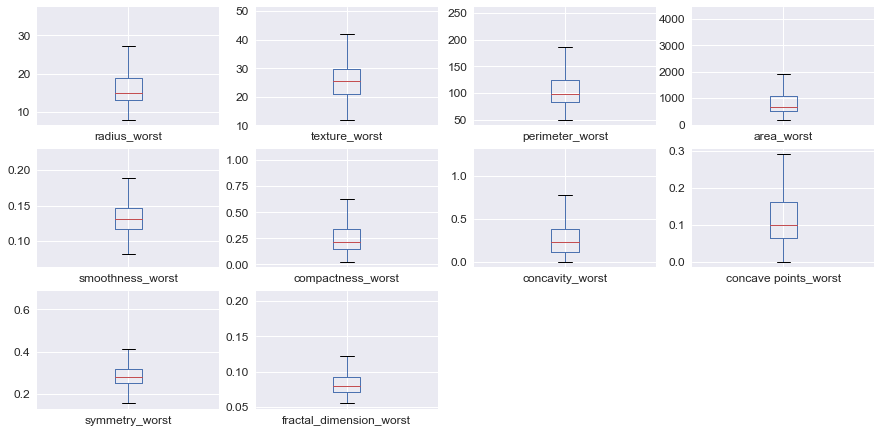

In [25]:
data_mean = all_df[np.concatenate((all_df.columns[21:], ['diagnosis']), axis=0)]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

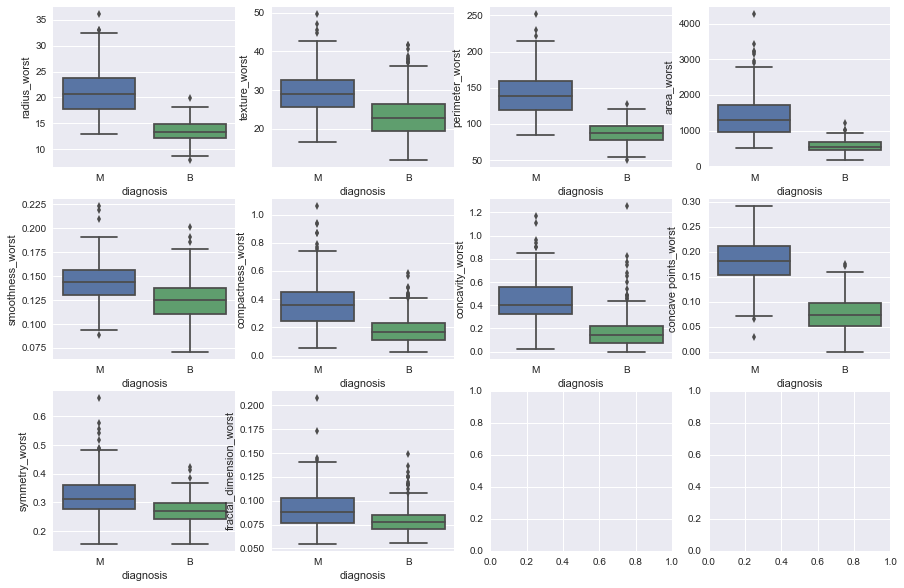

In [26]:
nrows, ncols = 3, 4
fig, axes =plt.subplots(nrows, ncols, figsize=(15,10))
for i, col in enumerate(all_df.columns[21:]):
    sns.boxplot(y=col, x='diagnosis', data=all_df, ax=axes[int(i/ncols)][i - ncols * int(i/ncols)])

**Observation**

We can see that perhaps the attributes **perimeter**, **radius**, **area**, **concavity**, **compactness** may have an exponential distribution ( ). We can also see that perhaps the **texture** and **smooth** and **symmetry** attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## 2.3. Multimodal Data Visualizations
* Correlation Matrix
* Scatter Plots

### Correlation Matrix

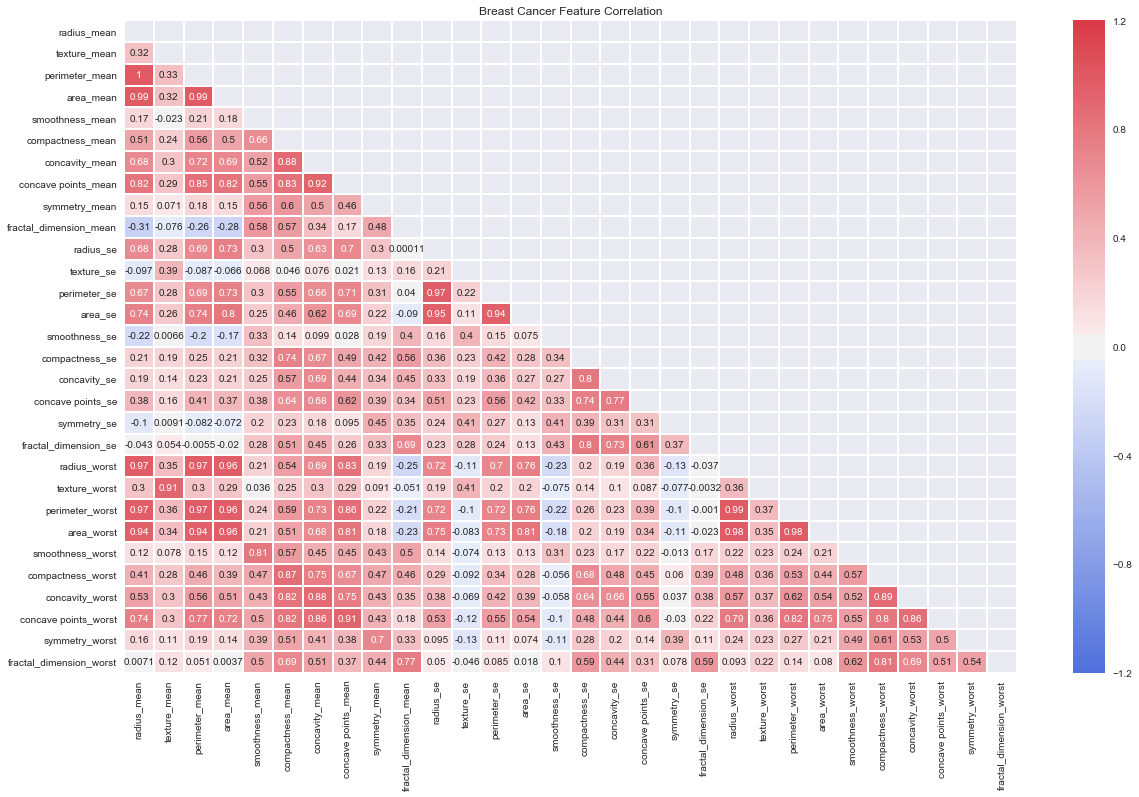

In [27]:
# Compute the correlation matrix
corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);
#sns.heatmap(corrMatt, mask=mask, vmax=1.2, square=True, annot=True, fmt='.2g', ax=ax);

**Observation:**

We can see strong positive relationship exists with mean values paramaters between 1 - 0.75.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
* Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.
    

### Scatter Plots

### Scatter plots of the "_mean" suffix features

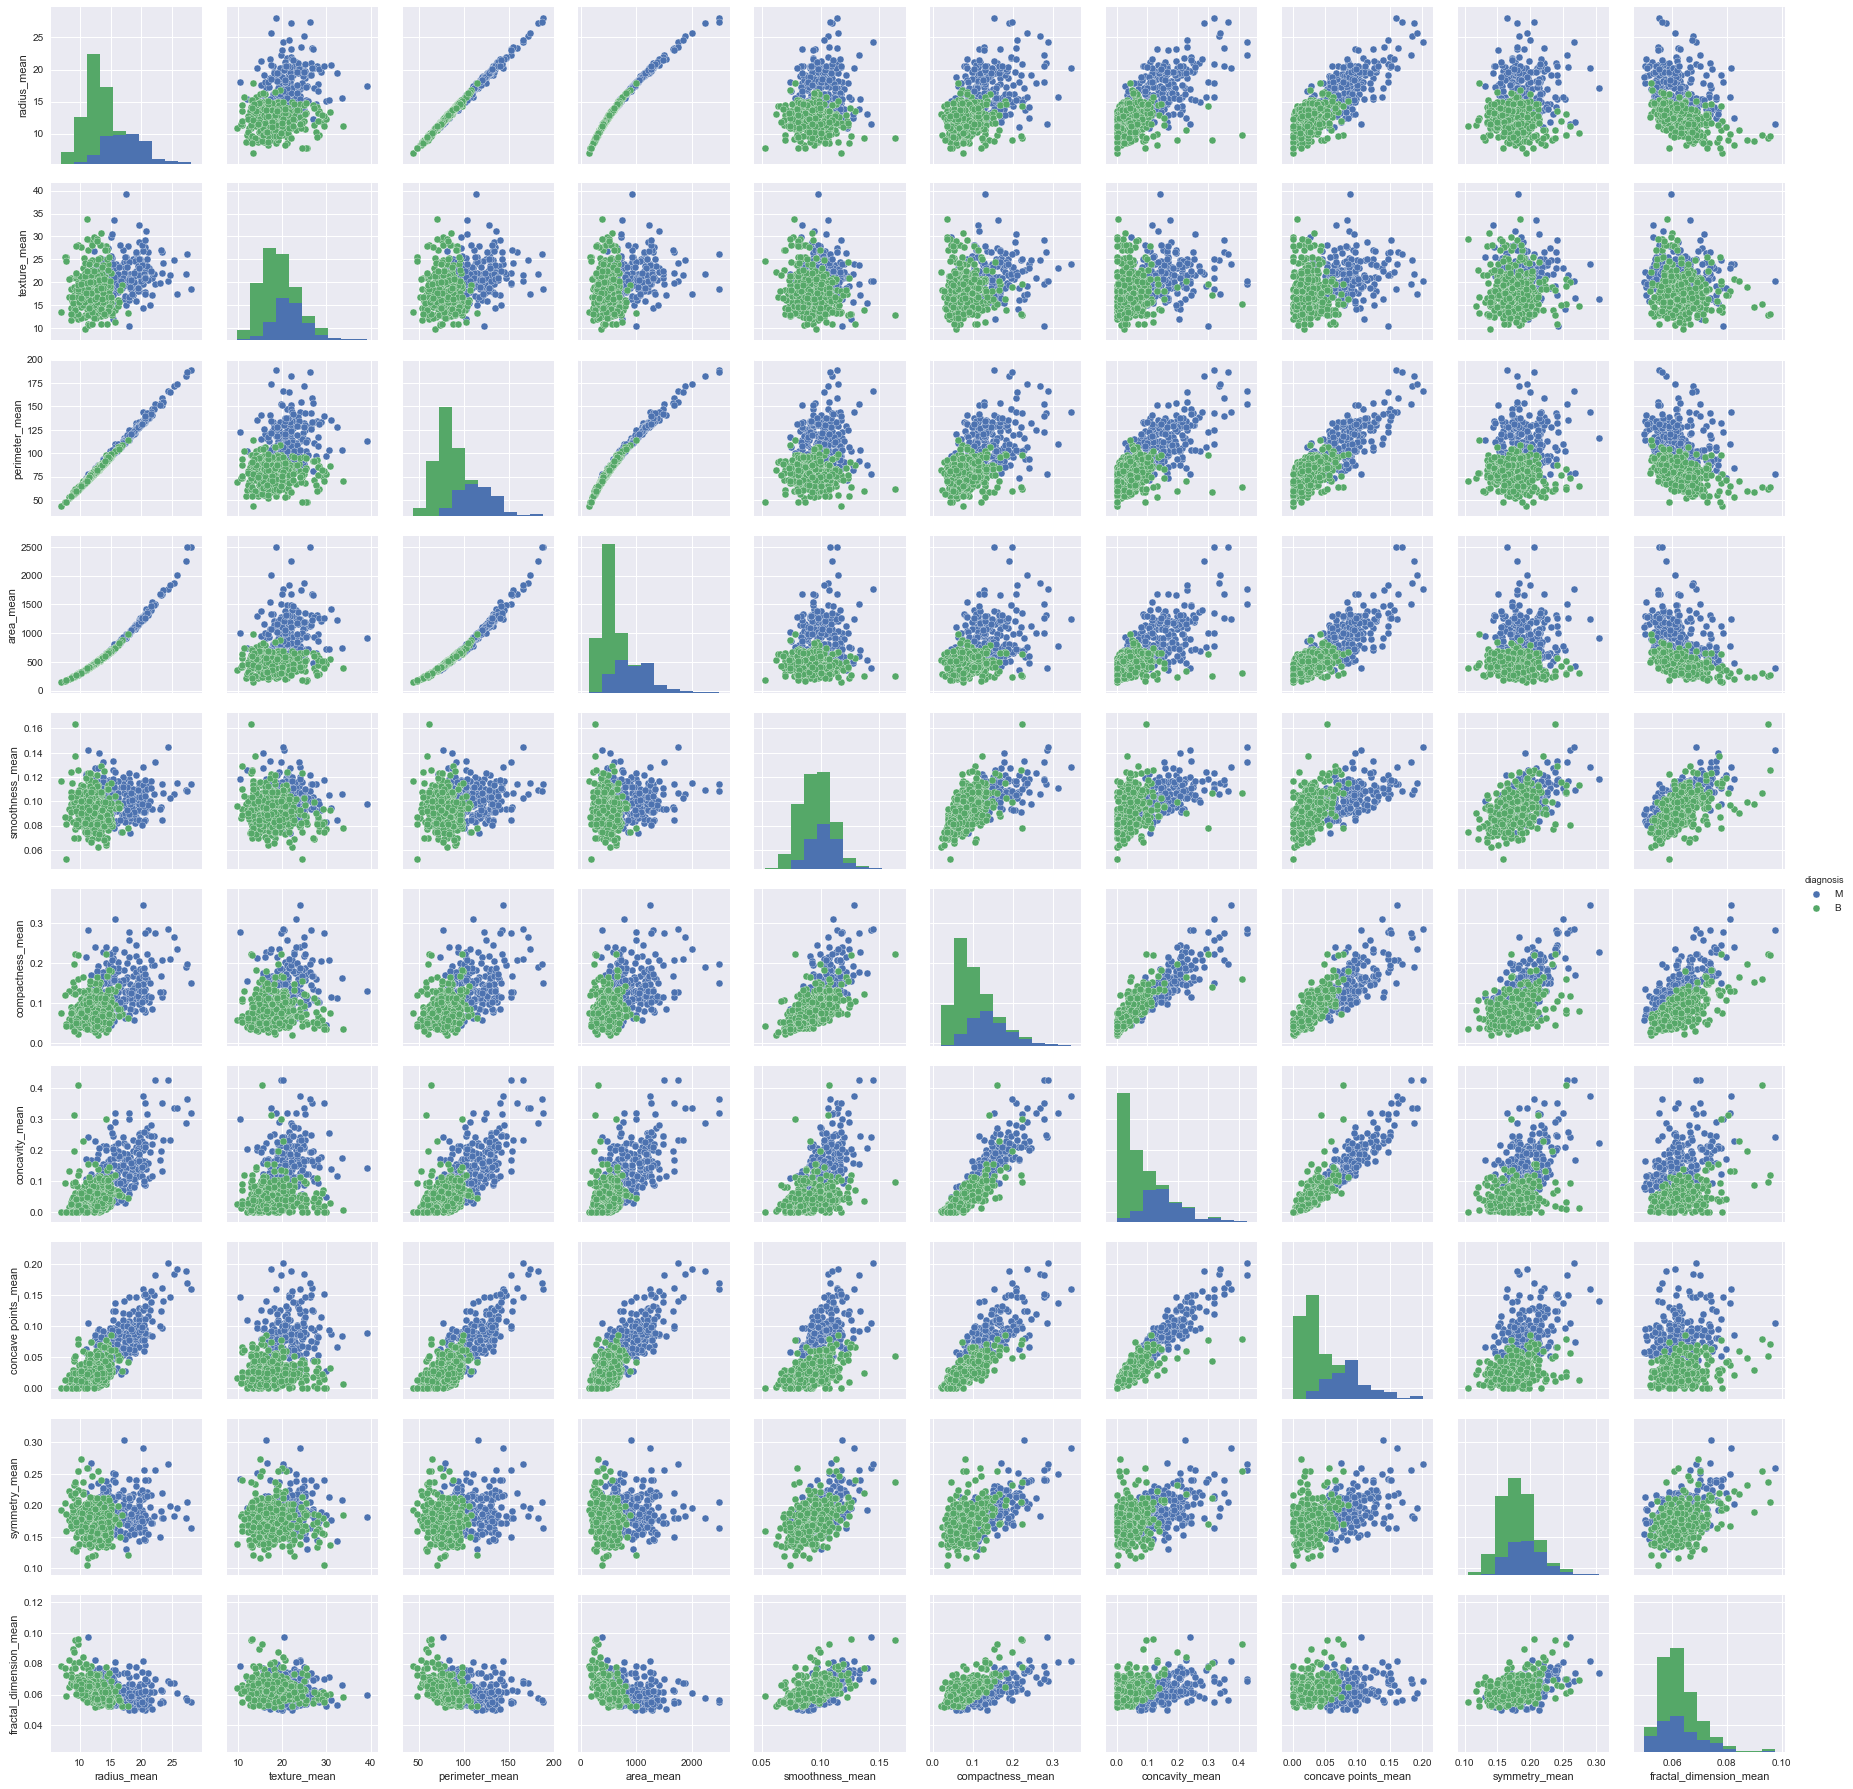

In [28]:
sns.pairplot(all_df[np.concatenate((all_df.columns[1:11], ['diagnosis']), axis=0)], hue="diagnosis");

### Scatter plots of the "_se" suffix features

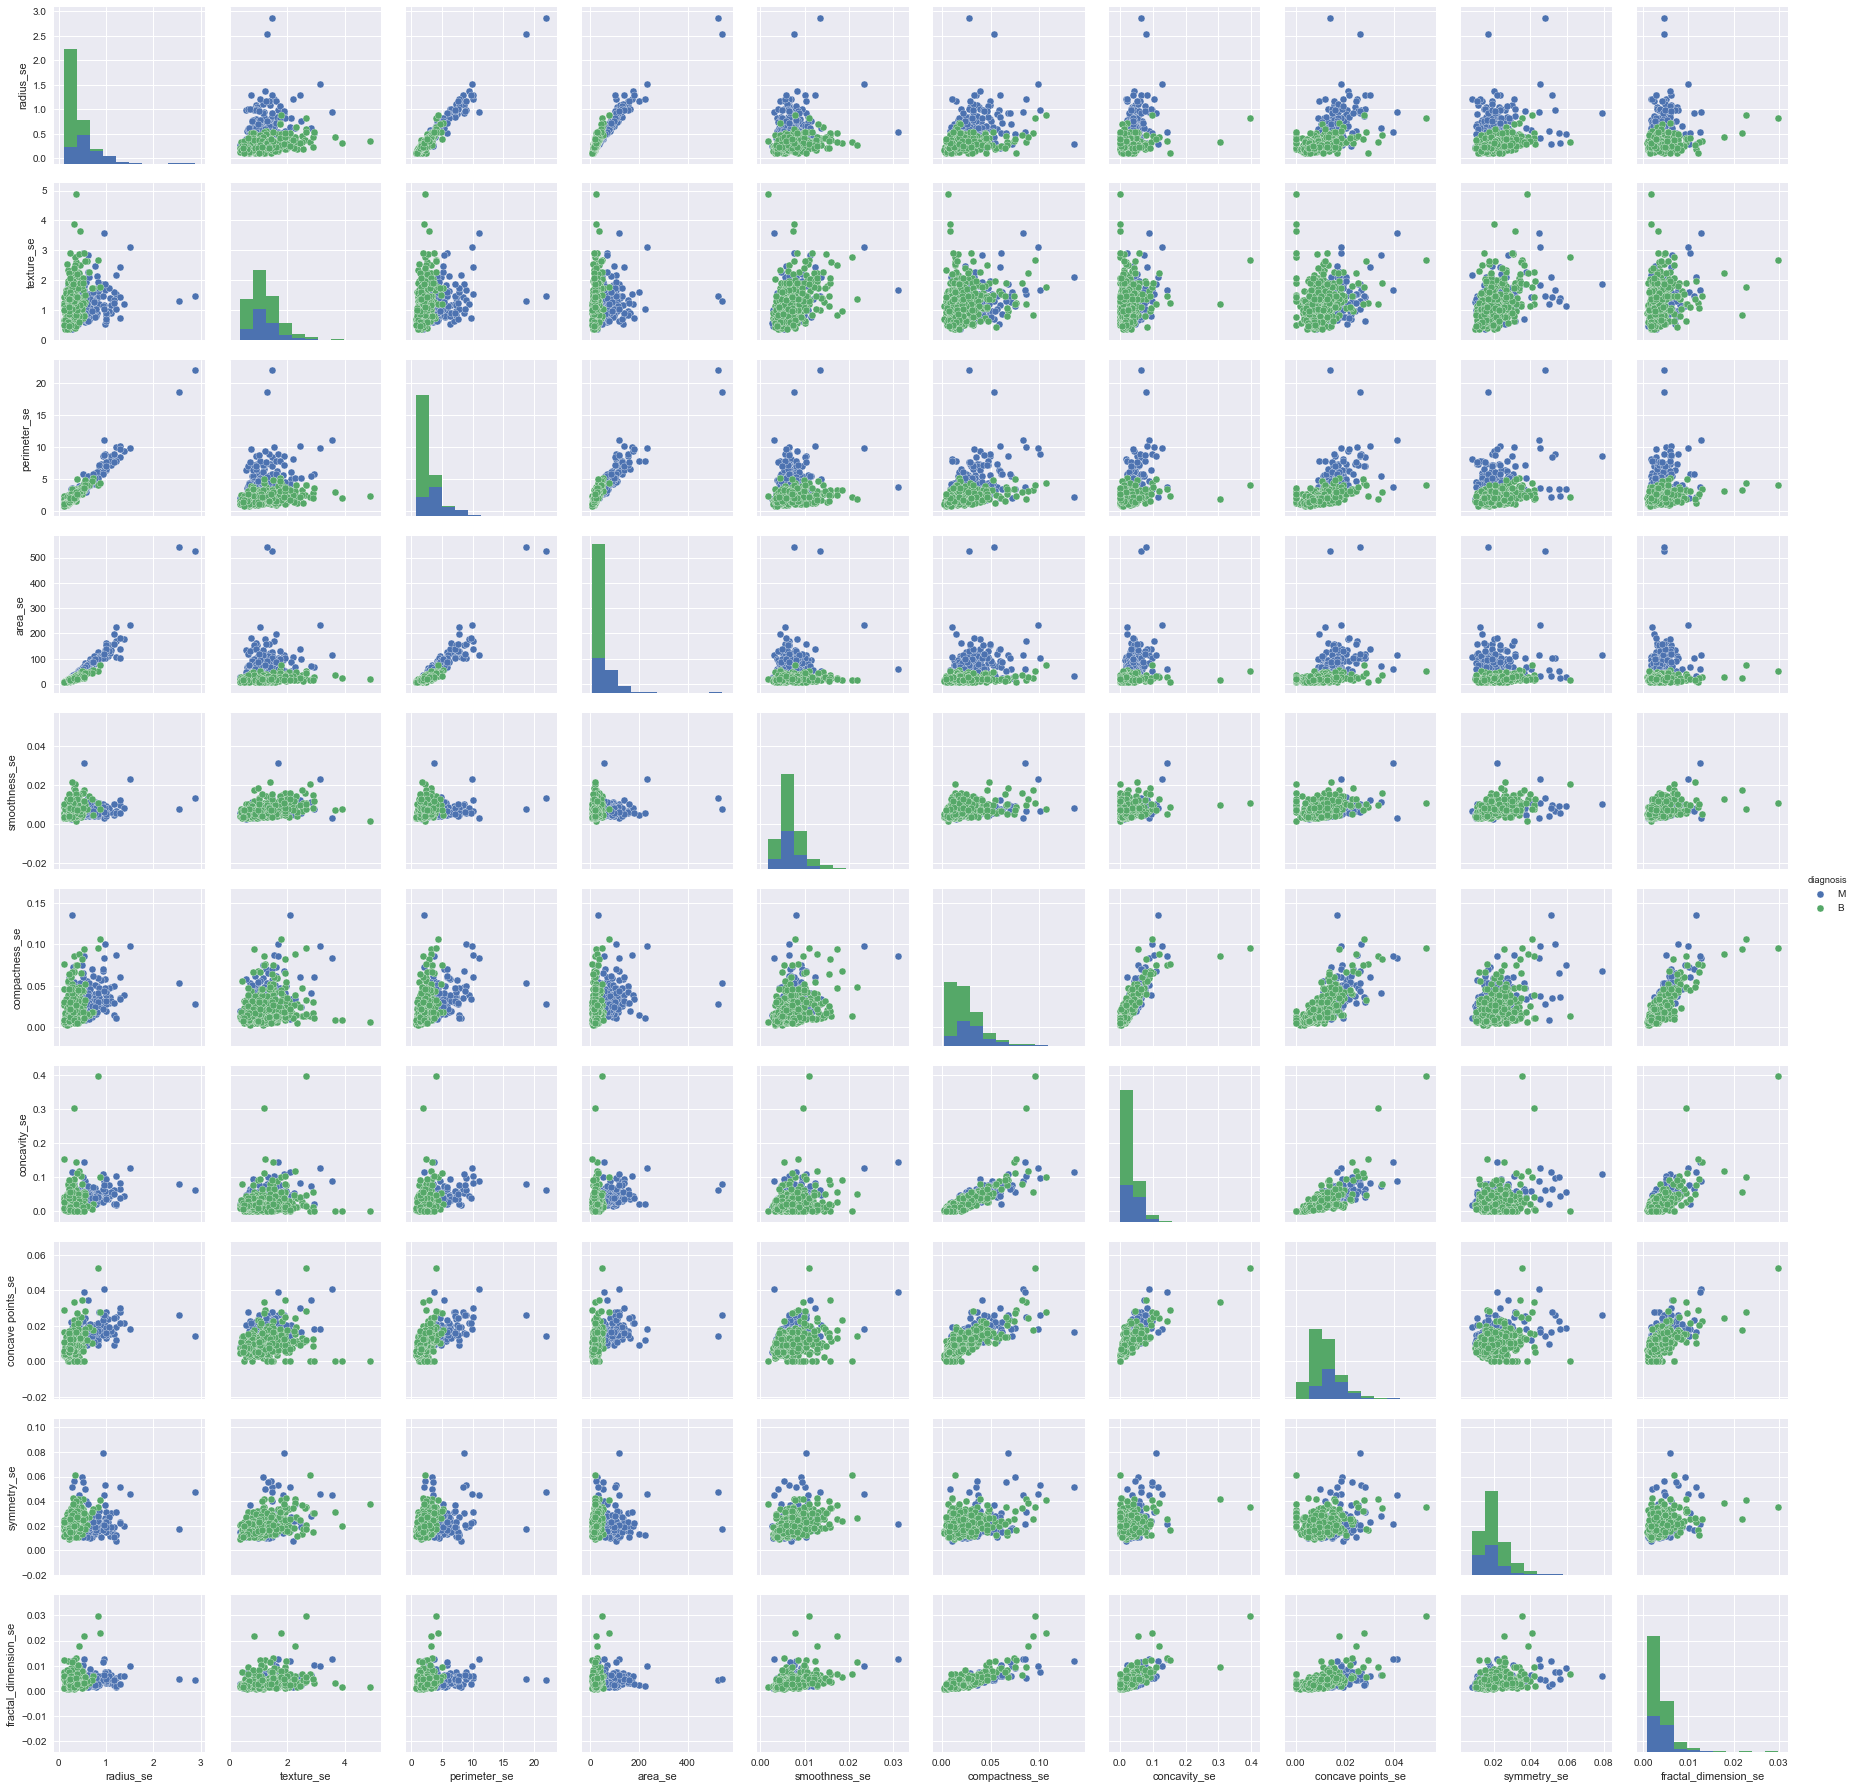

In [29]:
sns.pairplot(all_df[np.concatenate((all_df.columns[11:21], ['diagnosis']), axis=0)], hue="diagnosis");

### Scatter plots of the "_worst" suffix features

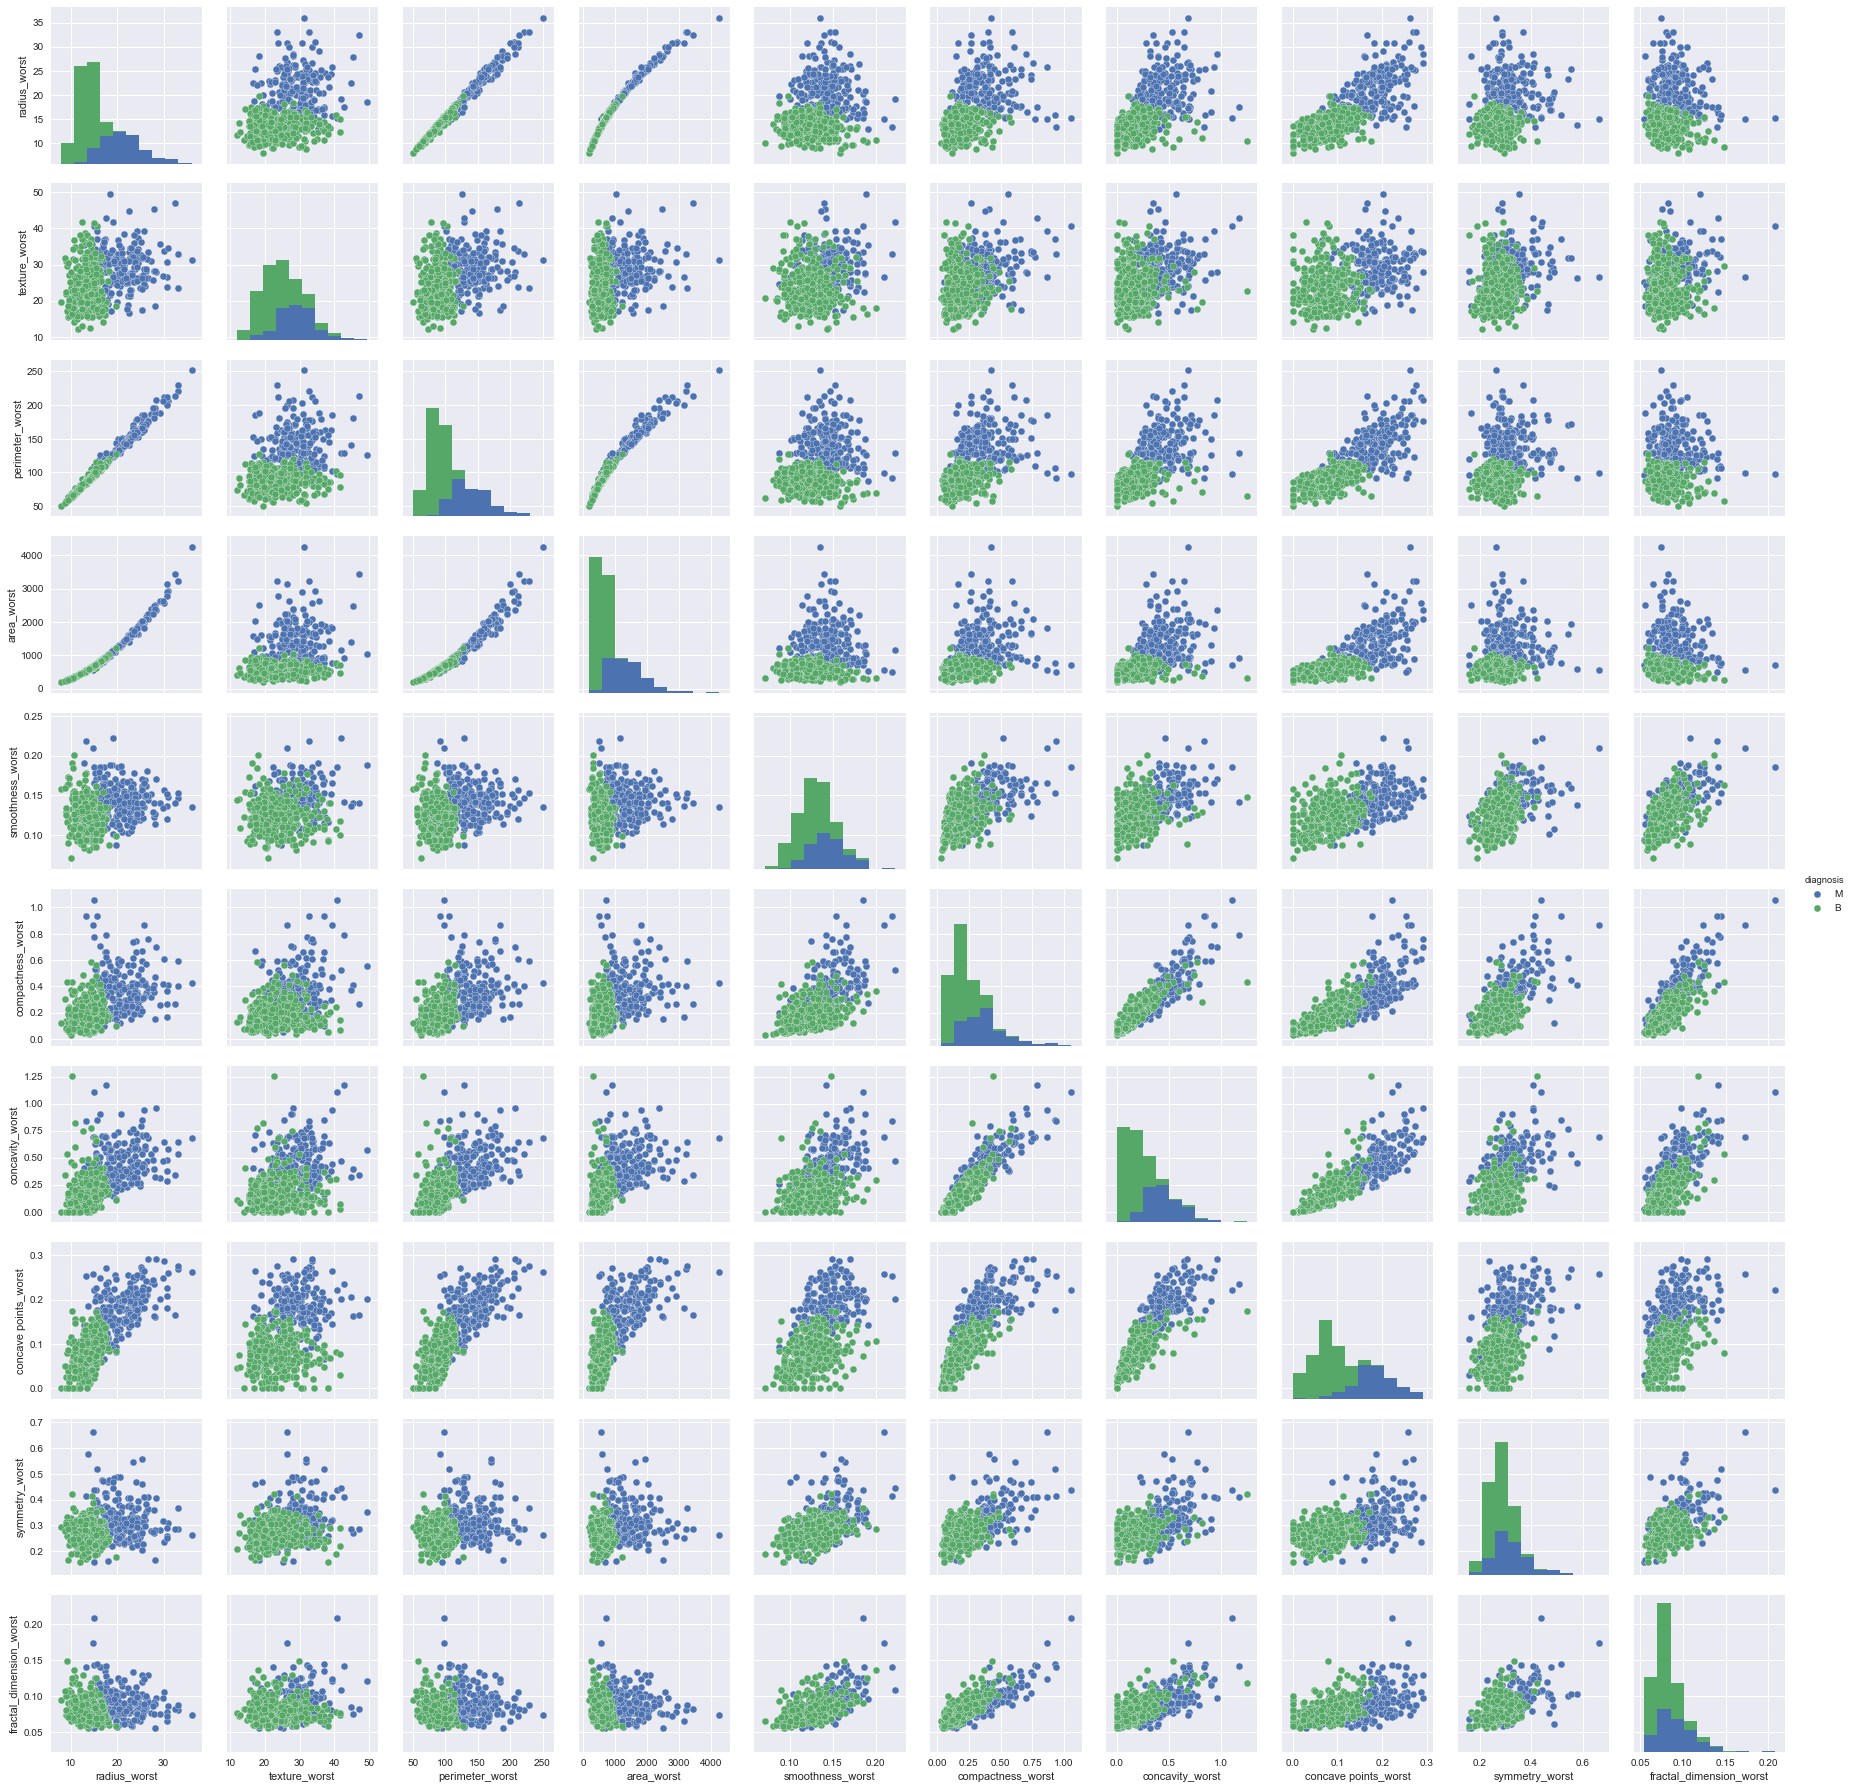

In [30]:
sns.pairplot(all_df[np.concatenate((all_df.columns[21:], ['diagnosis']), axis=0)], hue="diagnosis");

**Summary**

* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
* mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## 3. Pre-Processing the data

[Data preprocessing](http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html) is a crucial step for any data analysis problem.  It is often a very good idea to prepare our data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

In the previous section we explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. We identified some features of interest. Now, we will use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

In [31]:
all_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Handling Categorical Attributes : Label encoding
Here, we transform the class labels from their original string representation (M and B) into integers

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
diagnosis_encoded = encoder.fit_transform(all_df['diagnosis'])

In [33]:
print(encoder.classes_)

['B' 'M']


After encoding the class labels(diagnosis), the malignant tumors are now represented as class 1(i.e presence of cancer cells) and the benign tumors are represented as class 0 (i.e. no cancer cells detection), respectively.

#### Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here we will
* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part and 
* evaluate the predictions against the expected results. 

The size of the split can depend on the size and specifics of our dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [34]:
# stratified sampling
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(all_df, test_size=0.25, stratify = all_df['diagnosis'], random_state=7)

In [35]:
train_set.shape, test_set.shape

((426, 31), (143, 31))

In [36]:
X_train = train_set.drop('diagnosis', axis=1) # drop labels for training set
y_train = train_set['diagnosis'].copy()

In [37]:
X_test = test_set.drop('diagnosis', axis=1) # drop labels for testing set
y_test = test_set['diagnosis'].copy()

#### Feature Standardization

* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

* As seen in previous exploratory section that the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Let's evaluate the same algorithms with a standardized copy of the dataset. Here, we use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [38]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
X = all_df.iloc[:,1:31]
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

#### Feature decomposition using Principal Component Analysis(  PCA)

From the pair plots in exploratory analysis section above, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and retain as much information as possible when working with only 2 dimensions. We will use PCA.

Remember, PCA can be applied only on numerical data. Therefore, if the data has categorical variables they must be converted to numerical. Also, make sure we have done the basic data cleaning prior to implementing this technique. The directions of the components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine the component direction. Therefore, it is an unsupervised approach and hence response variable must be removed.

Note that the PCA directions are highly sensitive to data scaling, and most likely we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features. Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

In [39]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

In [40]:
X_pca = pca.transform(Xs)

In [41]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
PCA_df.sample(5)

PCA_1     PCA_2
293 -2.870588 -0.268645
346 -3.367966 -0.562929
94   2.775866  0.558001
65   1.812305  0.722740
46  -4.581937  1.484220

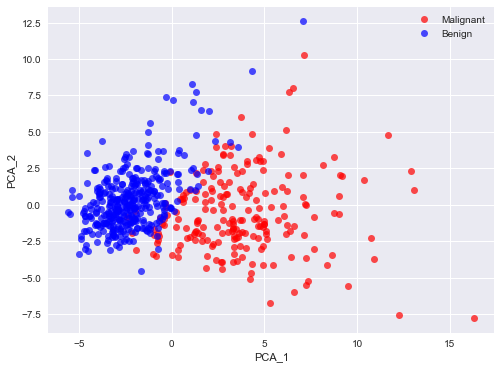

In [42]:
plt.figure(figsize=(8,6))
plt.plot(PCA_df['PCA_1'][all_df['diagnosis'] == 'M'],PCA_df['PCA_2'][all_df['diagnosis'] == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][all_df['diagnosis'] == 'B'],PCA_df['PCA_2'][all_df['diagnosis'] == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are "most spread" along the new feature axes.

#### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found [here](http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html), and [here](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/).

In [43]:
# The amount of variance that each PC explains
var_exp = pca.explained_variance_ratio_
var_exp

array([ 0.44272026,  0.18971182,  0.09393163,  0.06602135,  0.05495768,
        0.04024522,  0.02250734,  0.01588724,  0.01389649,  0.01168978])

In [44]:
# Cumulative Variance explains
cum_var_exp = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
cum_var_exp

array([ 0.4427,  0.6324,  0.7263,  0.7923,  0.8473,  0.8875,  0.91  ,
        0.9259,  0.9398,  0.9515])

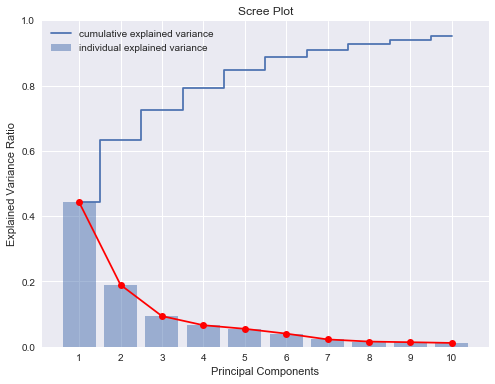

In [45]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.components_) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(pca.components_) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(range(1, len(pca.components_) + 1), var_exp, 'ro-')
plt.xticks(range(1, len(pca.components_) + 1))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show();

**Observation**

The most obvious change in slope in the scree plot occurs at component 2, which is the `"elbow"` of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

#### Principal Components HeatMap

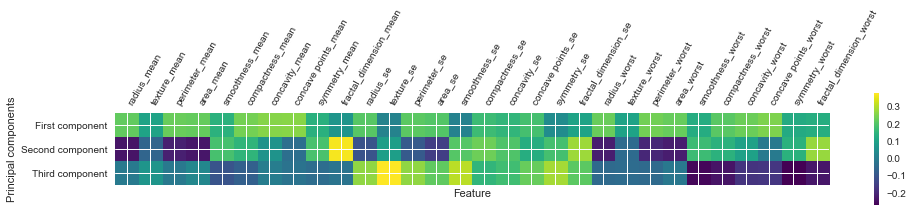

In [46]:
# vizualizing principle components as a heatmap this allows us to see what dimensions in the 'original space' are active

plt.matshow(pca.components_[0:3], cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [47]:
pca.components_[1]

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [48]:
len(X_pca[:,9])

569

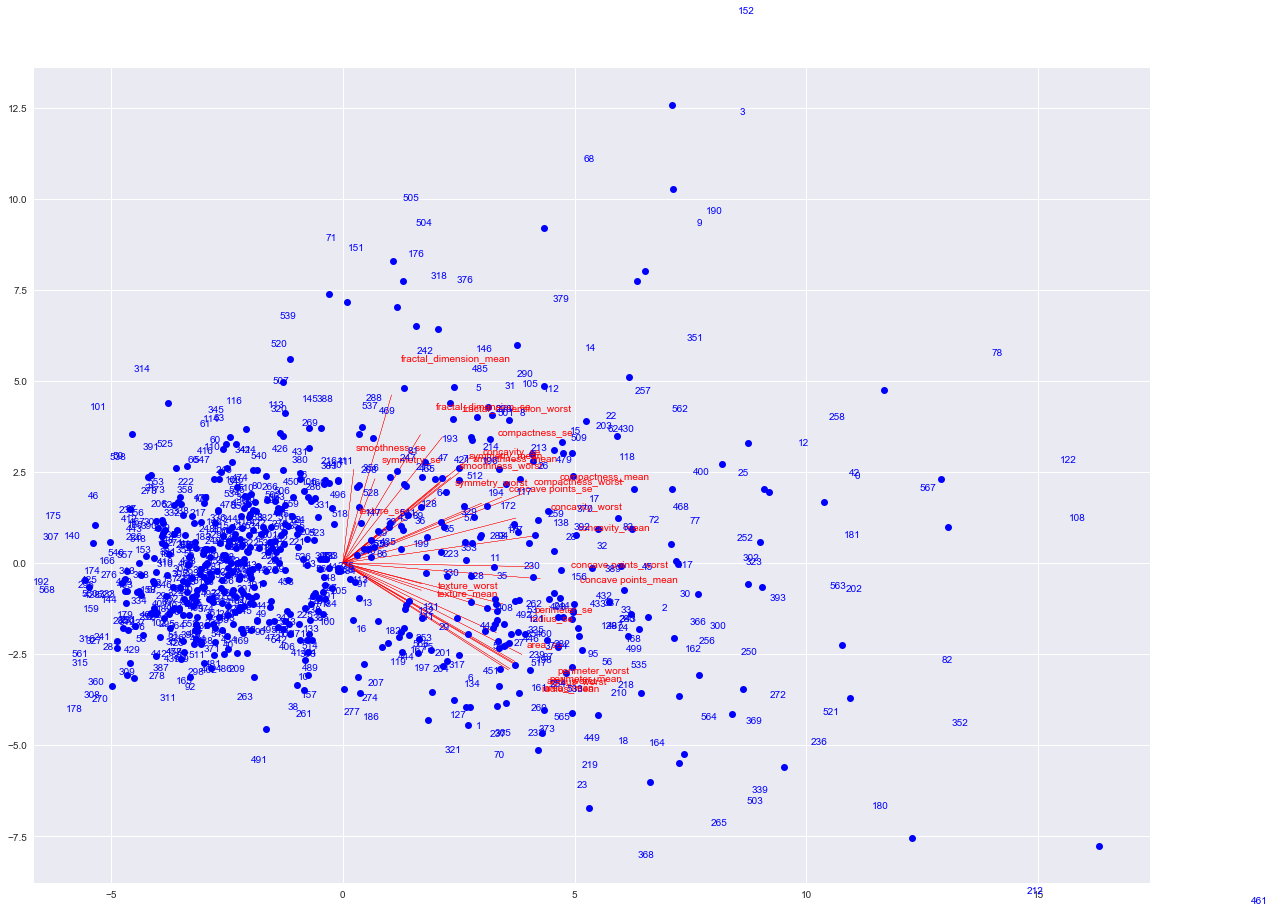

In [49]:
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = X_pca[:,0] # see 'prcomp(my_data)$x' in R
ys = X_pca[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
plt.figure(figsize=(20,15))
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(X.index)[i], color='b')

plt.show()

#### Principal Components Important Points

- We should not combine the train and test set to obtain PCA components of whole data at once. Because, this would violate the entire assumption of generalization since test data would get 'leaked' into the training set. In other words, the test data set would no longer remain 'unseen'. Eventually, this will hammer down the generalization capability of the model.

- We should not perform PCA on test and train data sets separately. Because, the resultant vectors from train and test PCAs will have different directions ( due to unequal variance). Due to this, we’ll end up comparing data registered on different axes. Therefore, the resulting vectors from train and test data should have same axes.

- We should do exactly the same transformation to the test set as we did to training set, including the center and scaling feature.

It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give us an unbiased estimated of our model's true performance. Hence, in the next section we will use cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.

## 4. Predictive model using Support Vector Machine (SVM)

Support vector machines (SVMs) learning algorithm will be used to build the predictive model.  SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets. 
1. SVMs allow for complex decision boundaries, even if the data has only a few features. 
2. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.
    **Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.**

3. SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

4.  SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

#### Important Parameters
The important parameters in kernel SVMs are the
* Regularization parameter C, 
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters. 

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

#### Classification with train and test split

As discussed in notebook setion 3 splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. 

In [50]:
from sklearn.preprocessing import LabelEncoder

# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
all_df['diagnosis'] = le.fit_transform(all_df['diagnosis'])

In [51]:
X = all_df.drop('diagnosis', axis=1) # drop labels for training set
y = all_df['diagnosis'].copy()

In [52]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [53]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)

In [54]:
# Create an SVM classifier and train it on 70% of the data set.
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(Xs_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
scaler = StandardScaler()
Xs_test = scaler.fit_transform(X_test)

In [56]:
classifier_score = clf.score(Xs_test, y_test)

In [57]:
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.97


To get a better measure of prediction accuracy (which we can use as a proxy for "goodness of fit" of the model), we can successively split the data into folds that we will use for training and testing:

#### Classification with cross-validation

Cross-validation extends the idea of train and test set split idea further. Instead of having a single train/test split, we specify **so-called folds** so that the data is divided into similarly-sized folds. 

* Training occurs by taking all folds except one - referred to as the holdout sample.

* On the completion of the training, we test the performance of our fitted model using the holdout sample. 

* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. 

* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. 

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. 

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [58]:
# Get average of 3-fold cross-validation score using an SVC estimator.
from sklearn.model_selection import cross_val_score
n_folds = 3
clf_cv = SVC()
cv_error = np.average(cross_val_score(clf_cv, Xs_train, y_train, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 3-fold cross-validation accuracy score for this classifier is 0.97


#### Classification with Feature Selection & cross-validation

The above evaluations were based on using the entire set of features. We will now employ the correlation-based feature selection strategy to assess the effect of using 3 features which have the best correlation with the class labels.

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

clf_fs_cv = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=3)),
    ('svc', SVC(probability=True))
])

scores = cross_val_score(clf_fs_cv, Xs_train, y_train, cv=3)

In [60]:
print(scores)
avg = (100*np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"  %avg)

[ 0.94776119  0.95454545  0.93939394]
Average score and uncertainty: (94.72 +- 0.358)%


From the above results, we can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features.

Feature selection is an important part of the model-building process that we must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, we will continue using the entire set of features.

### Model Accuracy: Receiver Operating Characteristic (ROC) curve

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)


|                 |Model predicts "+" |Model predicts  "-" |
|---------------- | ----------------- | -------------------|
|** Actual: "+" **| `True positive`   | `False negative`   | 
|** Actual: "-" **| `False positive`  | `True negative`    |
 In an ROC curve, we plot "True Positive Rate" on the Y-axis and "False Positive Rate" on the X-axis, where the values "true positive", "false negative", "false positive", and "true negative" are events (or their probabilities) as described above. The rates are defined according to the following:
* True positive rate (or sensitivity): tpr = tp / (tp + fn)
* False positive rate:       fpr = fp / (fp + tn)
* True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can  express
* the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell us how likely we are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").          

In [61]:
# The confusion matrix helps visualize the performance of the algorithm.
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

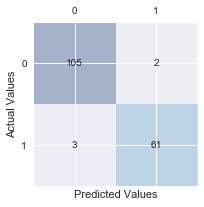

In [62]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [63]:
print(classification_report(y_test, y_pred ))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       107
          1       0.97      0.95      0.96        64

avg / total       0.97      0.97      0.97       171



#### Observation 
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign
= 0 (indicates abscence).

* The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
* Out of those 174 cases, the classifier predicted "yes" 61 times, and "no" 108 times.
* In reality, 64 patients in the sample have the disease, and 107 patients do not.

#### Rates as computed from the confusion matrix
1. **Accuracy**: Overall, how often is the classifier correct?
    * (TP+TN)/total = (TP+TN)/(P+N) = (61 + 105)/171 = 0.97

2. **Misclassification Rate**: Overall, how often is it wrong?
    * (FP+FN)/total = (FP+FN)/(P+N) = (2 + 3)/171 = 0.029 equivalent to 1 minus Accuracy also known as ***"Error Rate"***

3. **True Positive Rate:** When it's actually yes, how often does it predict 1? Out of all the positive (majority class) values, how many have been predicted correctly
   * TP/actual yes = TP/(TP + FN) = 61/(61 + 3) = 0.95 also known as ***"Sensitivity"*** or ***"Recall"***

4. **False Positive Rate**: When it's actually 0, how often does it predict 1?
   * FP/actual no = FP/N = FP/(FP + TN) = 2/(2 + 105) = 0.018 equivalent to 1 minus true negative rate

5. **True Negative Rate**: When it's actually 0, how often does it predict 0? Out of all the negative (minority class) values, how many have been predicted correctly’
   * TN/actual no = TN / N = TN/(TN + FP) = 105/(105 + 2) = 0.98 also known as ***Specificity***, equivalent to 1 minus False Positive Rate

6. **Precision**: When it predicts 1, how often is it correct?
   * TP/predicted yes = TP/(TP + FP) = 61/(61 + 2) = 0.97

7. **Prevalence**: How often does the yes condition actually occur in our sample?
   * actual yes/total = 64/171 = 0.34

8. **F score**: It is the harmonic mean of precision and recall. It is used to compare several models side-by-side. Higher the better.
   * 2 x (Precision x Recall)/ (Precision + Recall)  = 2 x (0.97 x 0.95) / (0.97 + 0.95) = 0.96 

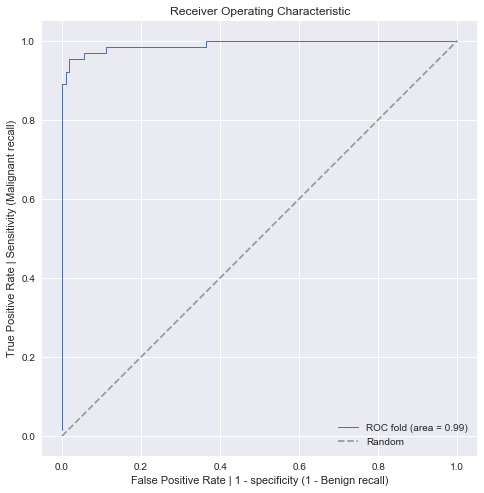

In [64]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate | 1 - specificity (1 - Benign recall)')
plt.ylabel('True Positive Rate | Sensitivity (Malignant recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.axes().set_aspect(1)

* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

* For the points above the diagonal, tpr > fpr, and the model says that we are in a zone where we are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is (0.99 / (0.99 + 0.01)) = 99. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal we are positioned, the better the classification model.

## 5. Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

### 5.1 Importance of optimizing a classifier

We can tune two key parameters of the SVM algorithm:
* the value of C (how much to relax the margin) 
* and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will perform a grid search using 5-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:
* Grid Search Parameter Tuning. 
* Random Search Parameter Tuning.

In [65]:
from sklearn.model_selection import GridSearchCV

# Train classifiers.
kernel_values = [ 'linear', 'poly', 'rbf', 'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(Xs_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.10000000000000001, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [69]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

In [74]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

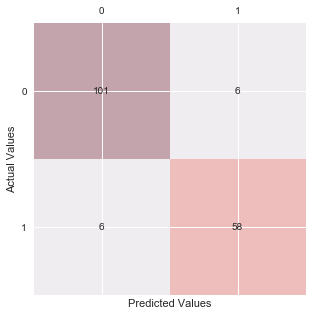

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [76]:
print(classification_report(y_test, y_pred ))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       107
          1       0.91      0.91      0.91        64

avg / total       0.93      0.93      0.93       171



In [77]:
Xtrain = X_train.iloc[:, :2]

In [78]:
svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=1.0)

In [79]:
svm.fit(Xtrain, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [81]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

In [82]:
Z.shape

(73312,)

### TODO: Anindya

In [83]:
Z = Z.reshape(xx.shape)

In [84]:
Z.shape

(316, 232)

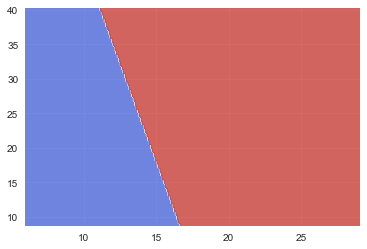

In [85]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

## 6. Automate the ML process using pipelines 

There are standard workflows in a machine learning project that can be automated. In Python `scikit-learn`, Pipelines help to clearly define and automate these workflows.
* Pipelines help overcome common problems like data leakage in our test harness. 
* Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

### 6.1 Data Preparation and Modeling Pipeline

#### 6.1.1 Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models  
4. Select the best model

#### 6.1.2 Validation Dataset

In [89]:
# read the data
all_df = pd.read_csv('data/data.csv', index_col=False)
all_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [90]:
all_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [91]:
# Id column is redundant and not useful, we want to drop it
all_df.drop('id', axis =1, inplace=True)

In [92]:
from sklearn.preprocessing import LabelEncoder

# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
all_df['diagnosis'] = le.fit_transform(all_df['diagnosis'])

In [93]:
X = all_df.drop('diagnosis', axis=1) # drop labels for training set
y = all_df['diagnosis'].copy()

In [94]:
# Divide records in training and testing sets: stratified sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [95]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)

### 6.2 Evaluate Algorithms: Baseline

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=4)
    results.append(cv_results)
    names.append(name)

In [126]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
LR    : 0.952372 (0.041013)
LDA   : 0.967308 (0.035678)
KNN   : 0.932179 (0.037324)
CART  : 0.947308 (0.023500)
NB    : 0.937308 (0.042266)
SVM   : 0.627885 (0.070174)


**Observation**

The results suggest That both Logistic Regression and LDA may be worth further study. These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.

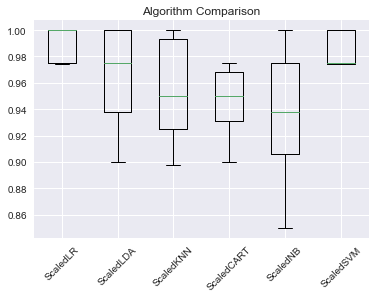

In [133]:
# Compare Algorithms
plt.figure()
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.show()

**Observation**

The results show a similar tight distribution for all classifiers except SVM which is encouraging, suggesting low variance. The poor results for SVM are surprising.

It is possible the varied distribution of the attributes may have an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.

### 6.3 Evaluate Algorithms: Standardize Data

In [129]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=4)
    results.append(cv_results)
    names.append(name)

In [131]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
ScaledLR  : 0.984936 (0.022942)
ScaledLDA : 0.967308 (0.035678)
ScaledKNN : 0.952179 (0.038156)
ScaledCART: 0.947308 (0.023500)
ScaledNB  : 0.937244 (0.043887)
ScaledSVM : 0.969936 (0.038398)


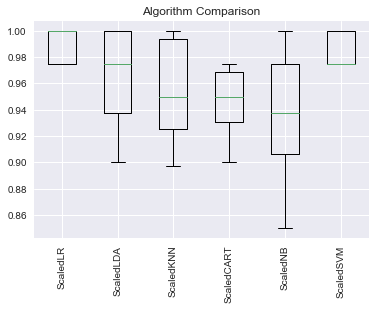

In [135]:
# Compare Algorithms
plt.figure()
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names, rotation="90")
plt.show()

**Observations**

The results show that standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

The results suggest digging deeper into the SVM and LDA and LR algorithms. It is very likely that configuration beyond the default may yield even more accurate models.

### 6.4 Algorithm Tuning
In this section we investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, LDA and SVM.

#### Tuning hyper-parameters - SVC estimator

In [145]:
# Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

# Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [146]:
scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=-1, verbose=0)
print('SVC Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

SVC Model Training Accuracy: 0.960 +/- 0.039


In [147]:
from sklearn.model_selection import GridSearchCV

# Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs_svc = gs_svc.fit(X_train, y_train)

In [148]:
print('SVC Model Tuned Parameters Best Score: ', gs_svc.best_score_)
print('SVC Model Best Parameters: ', gs_svc.best_params_)

SVC Model Tuned Parameters Best Score:  0.984924623116
SVC Model Best Parameters:  {'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


#### Tuning the hyper-parameters - k-NN hyperparameters
 For our standard k-NN implementation, there are two primary hyperparameters that we’ll want to tune:

* The number of neighbors k.
* The distance metric/similarity function.

Both of these values can dramatically affect the accuracy of our k-NN classifier. Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric. In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times. Each time, the n_neighbors parameter should be given a different value from the list.

We can't give `GridSearchCV` just a list
We've to specify `n_neighbors` should take on 1 through 30
We can set `n_jobs` = -1 to run computations in parallel (if supported by your computer and OS) 

In [141]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [142]:
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=-1)
print('Knn Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Knn Model Training Accuracy: 0.945 +/- 0.027


In [143]:
# Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy',
                    n_jobs=-1)
gs_knn = grid.fit(X_train, y_train)

In [144]:
print('Knn Model Tuned Parameters Best Score: ', gs_knn.best_score_)
print('Knn Model Best Parameters: ', gs_knn.best_params_)

Knn Model Tuned Parameters Best Score:  0.947236180905
Knn Model Best Parameters:  {'clf__n_neighbors': 6}


### 6.5 Finalize Model

In [149]:
# Use best parameters
clf_svc = gs_svc.best_estimator_

# Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

In [150]:
print('Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('Final Accuracy on Test set: %.5f' % clf_svc.score(X_test, y_test))

Final Model Training Accuracy: 0.985 +/- 0.020
Final Accuracy on Test set: 0.95906


In [151]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

In [155]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.959064327485
[[106   1]
 [  6  58]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       107
          1       0.98      0.91      0.94        64

avg / total       0.96      0.96      0.96       171

